In [1]:
from utils import vector_simplify, pretty_results, get_vector_arguments

%display latex

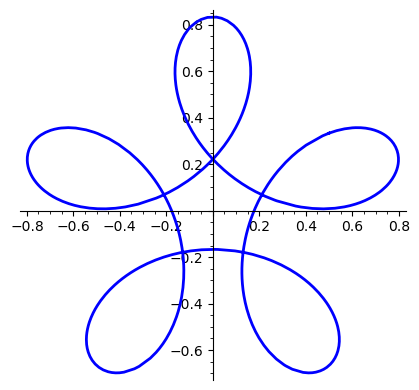

In [2]:
# curve definition
curve_alpha(t) = (1/2 * cos(t) + 1/3 * sin(4 * t), 1/2 * sin(t) + 1/3 * cos(4 * t))

# plot
parametric_plot(curve_alpha, (t,0, 2*pi), thickness=2)

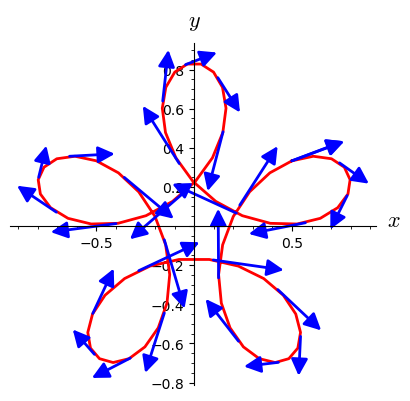

In [3]:
M = Manifold(2, 'M') #https://doc.sagemath.org/html/en/reference/manifolds/sage/manifolds/differentiable/curve.html#curves-in-manifolds
X.<x,y> = M.chart()

c = M.curve([1/2 * cos(t) + 1/3 * sin(4 * t), 1/2 * sin(t) + 1/3 * cos(4 * t)], (t, 0, 2*pi))

v = c.tangent_vector_field() ; v

show(c.plot(thickness=2, aspect_ratio=1) +
     v.plot(chart=X, number_values=30, scale=.2))

In [4]:
curve_alpha(s) = (2 * cos(s), 2 * sin(s))

x = get_vector_arguments(curve_alpha).pop()
curve_alpha_x = curve_alpha.derivative(x)
    
# Calcular comprimento de arco de 0 a t
t = var("t")
assume(t>0)
s = integrate(norm(curve_alpha_x), (x,0,t))
s = s.simplify_full()

pretty_results((r"\int_0^t || C'(x) || dx", s))

\begin{align*} \int_0^t || C'(x) || dx &= 2 \, t \\ \end{align*} \\

In [8]:
# define the curve
curve(t) = (2 * cos(s), 2 * sin(s))

# calculate the derivatives
curve_t = curve.derivative(t)
curve_tt = curve_t.derivative(t)

# calculate J(c'(t))
curve_t_rotation(t) = (- curve_t[1], curve_t[0])

# calculate the curvature
curvatura = curve_t_rotation.dot_product(curve_tt)/norm(curve_t)^3
curvatura = curvatura.simplify_full()

# plot
pretty_results((r"K(s)", curvatura), use_colon=True)

\begin{align*} K(s) :& \quad \frac{1}{2} \\ \end{align*} \\